# EDA notebook -- scratchbook to play & understand the data
### Feel free to mess around!

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
display(HTML("<style>.container { width:95% !important; }</style>"))

In [80]:
root = "data/anime-recommendations-database/"
root2 = "data/anime-data-score-staff-synopsis-and-genre/"
anime_data = pd.read_csv(root + "anime.csv")

In [15]:
print (anime_data.shape)
anime_data.head(10)

(12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [12]:
rating_data = pd.read_csv(root + "rating.csv")

In [14]:
print (rating_data.shape)
rating_data.head(10)

(7813737, 3)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [19]:
plt.plot(rating_data.rating.value_counts())

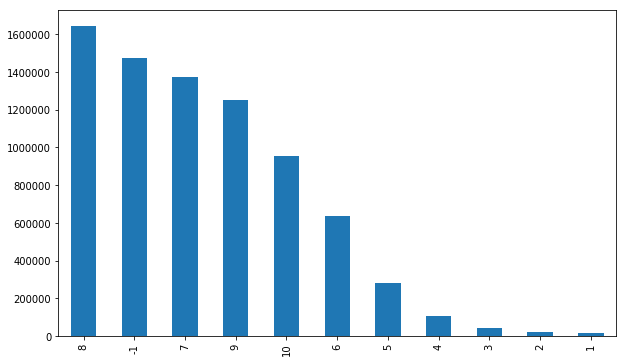

In [48]:
# Seems like there are a ton of -1 ratings (where people didn't rate). May be worthwhile to delete all of them (>1.4M data) 
rating_data.rating.value_counts().plot(kind='bar')
plt.show()

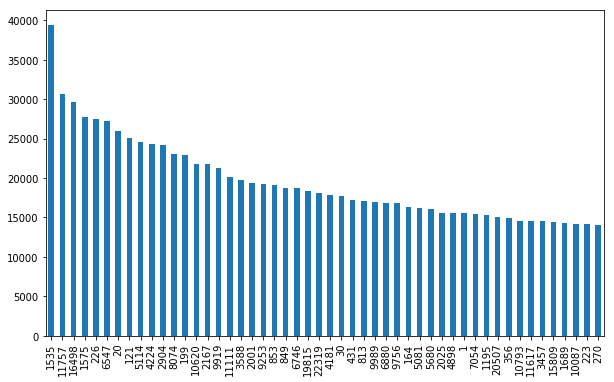

In [47]:
# lol, the anime with the most ratings is deathnote
rating_data.anime_id.value_counts()[:50].plot(kind='bar')
plt.show()

In [66]:
top_50_frequently_rated = list(rating_data.anime_id.value_counts()[:25].keys())

In [67]:
anime_data[anime_data['anime_id'].isin(top_50_frequently_rated)]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
118,19815,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [81]:
new_df = pd.read_csv(root2 + "dataanime.csv")

In [83]:
print (new_df.shape)
new_df.head()

(1563, 20)


,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [84]:
new_df = pd.read_csv("data/tidy_anime.csv")

In [85]:
print(new_df.shape)
new_df.head()

(77911, 28)


,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,Bandai Visual,Action,Sunrise,...,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,Bandai Visual,Adventure,Sunrise,...,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
2,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,Bandai Visual,Comedy,Sunrise,...,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
3,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,Bandai Visual,Drama,Sunrise,...,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
4,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,Bandai Visual,Sci-Fi,Sunrise,...,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."


In [86]:
new_df.columns.tolist()

['animeID',
 'name',
 'title_english',
 'title_japanese',
 'title_synonyms',
 'type',
 'source',
 'producers',
 'genre',
 'studio',
 'episodes',
 'status',
 'airing',
 'start_date',
 'end_date',
 'duration',
 'rating',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'favorites',
 'synopsis',
 'background',
 'premiered',
 'broadcast',
 'related']

In [87]:
desired_cols = ['animeID', 'title_english', 'type', 'source', 'producers', 'genre', 'studio',
               'episodes', 'premiered', 'rating', 'score', 'scored_by', 'rank', 'popularity',
               'members', 'favorites', 'synopsis', 'background']
new_df[desired_cols].head()

,animeID,title_english,type,source,producers,genre,studio,episodes,premiered,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background
0,1,Cowboy Bebop,TV,Original,Bandai Visual,Action,Sunrise,26.0,Spring 1998,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...
1,1,Cowboy Bebop,TV,Original,Bandai Visual,Adventure,Sunrise,26.0,Spring 1998,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...
2,1,Cowboy Bebop,TV,Original,Bandai Visual,Comedy,Sunrise,26.0,Spring 1998,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...
3,1,Cowboy Bebop,TV,Original,Bandai Visual,Drama,Sunrise,26.0,Spring 1998,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...
4,1,Cowboy Bebop,TV,Original,Bandai Visual,Sci-Fi,Sunrise,26.0,Spring 1998,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...


# Join the datasets, clean

* Rename rating column (duplicated)
* Join anime_data and rating_data on anime_id
* Remove all ratings of -1

In [77]:
anime_data = anime_data.rename(columns={"rating": "overall_rating"})
anime_data.head()

,anime_id,name,genre,type,episodes,overall_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [78]:
rating_data = rating_data.rename(columns={"rating": "user_rating"})
rating_data.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [79]:
merged_df = pd.merge(anime_data, rating_data, on='anime_id')
merged_df.head()

,anime_id,name,genre,type,episodes,overall_rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
